In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn import tree
from matplotlib.backends.backend_pdf import PdfPages
from IPython.core.debugger import set_trace

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime

In [2]:
df_econ=pd.read_csv("df_econ.csv")
df_econ.rename(columns = {'Unnamed: 0':'yyyymm'}, inplace = True) 
df_econ.set_index('yyyymm',inplace=True)
df_genre=pd.read_csv('smoothed12_genres.csv')
df_genre.set_index('date',inplace=True)

In [3]:
data=pd.concat([df_econ,df_genre],axis=1,join="inner")

In [4]:
# turn the index back into a read date for better graphing
dt=[]
for value in data.index.values:
    blurp=datetime.datetime(value//100,int(value%100),1)
    dt.append(blurp)
data['date']=dt
data.set_index(['date'],inplace=True)
data

,inflation,S&Pyield,unemployment,UMCSENT,homeindex,UMCSENT.1,Action,Adventure,Comedy,Drama,Horror,Thriller/Suspense
date,,,,,,,,,,,,
2006-01-01,0.091619,0.305601,4.7,86.7,0.0914,86.7,0.152123,0.231897,0.274552,0.230195,0.111233,0.000000
2006-02-01,0.026267,0.005438,4.8,88.9,0.0914,88.9,0.076489,0.344049,0.239367,0.132611,0.156461,0.051024
2006-03-01,0.068548,0.133150,4.7,87.4,0.0914,87.4,0.183584,0.283096,0.225794,0.100863,0.115545,0.091117
2006-04-01,0.098229,0.145868,4.7,79.1,0.0710,79.1,0.069127,0.223197,0.331895,0.211193,0.101817,0.062772
2006-05-01,0.059652,-0.371003,4.6,84.9,0.0710,84.9,0.337402,0.251132,0.097115,0.083424,0.061260,0.169667
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0.037833,0.840776,8.4,80.4,0.0808,80.4,0.110500,0.372711,0.031772,0.185278,0.171601,0.128138
2020-09-01,0.016722,-0.470736,7.8,81.8,0.0808,81.8,0.131132,0.418933,0.035941,0.166049,0.109102,0.138843
2020-10-01,0.004987,-0.331989,6.9,76.9,0.1077,76.9,0.136187,0.441706,0.025901,0.190018,0.122910,0.083278


In [5]:
data.rename(columns = {'Thriller/Suspense':'Thriller-Suspense'}, inplace = True) 
data

,inflation,S&Pyield,unemployment,UMCSENT,homeindex,UMCSENT.1,Action,Adventure,Comedy,Drama,Horror,Thriller-Suspense
date,,,,,,,,,,,,
2006-01-01,0.091619,0.305601,4.7,86.7,0.0914,86.7,0.152123,0.231897,0.274552,0.230195,0.111233,0.000000
2006-02-01,0.026267,0.005438,4.8,88.9,0.0914,88.9,0.076489,0.344049,0.239367,0.132611,0.156461,0.051024
2006-03-01,0.068548,0.133150,4.7,87.4,0.0914,87.4,0.183584,0.283096,0.225794,0.100863,0.115545,0.091117
2006-04-01,0.098229,0.145868,4.7,79.1,0.0710,79.1,0.069127,0.223197,0.331895,0.211193,0.101817,0.062772
2006-05-01,0.059652,-0.371003,4.6,84.9,0.0710,84.9,0.337402,0.251132,0.097115,0.083424,0.061260,0.169667
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0.037833,0.840776,8.4,80.4,0.0808,80.4,0.110500,0.372711,0.031772,0.185278,0.171601,0.128138
2020-09-01,0.016722,-0.470736,7.8,81.8,0.0808,81.8,0.131132,0.418933,0.035941,0.166049,0.109102,0.138843
2020-10-01,0.004987,-0.331989,6.9,76.9,0.1077,76.9,0.136187,0.441706,0.025901,0.190018,0.122910,0.083278


In [6]:
X=data[['inflation','S&Pyield','unemployment','UMCSENT','homeindex']]
#X=data[['UMCSENT']]
X

,inflation,S&Pyield,unemployment,UMCSENT,homeindex
date,,,,,
2006-01-01,0.091619,0.305601,4.7,86.7,0.0914
2006-02-01,0.026267,0.005438,4.8,88.9,0.0914
2006-03-01,0.068548,0.133150,4.7,87.4,0.0914
2006-04-01,0.098229,0.145868,4.7,79.1,0.0710
2006-05-01,0.059652,-0.371003,4.6,84.9,0.0710
...,...,...,...,...,...
2020-08-01,0.037833,0.840776,8.4,80.4,0.0808
2020-09-01,0.016722,-0.470736,7.8,81.8,0.0808
2020-10-01,0.004987,-0.331989,6.9,76.9,0.1077


In [7]:
data_scaler=StandardScaler()
X_scaled=data_scaler.fit_transform(X)

<ipython-input-8-40d60ec4005d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['linear']=y_pred
<ipython-input-8-40d60ec4005d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['linear']=y_pred
<ipython-input-8-40d60ec4005d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

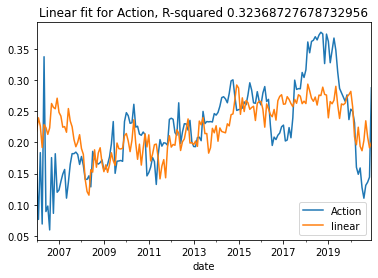

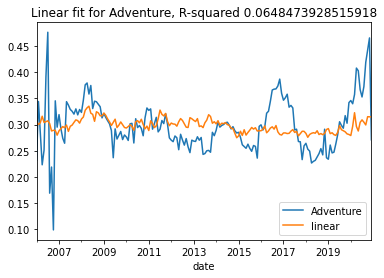

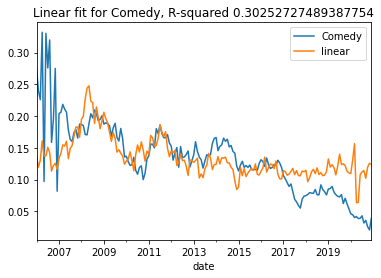

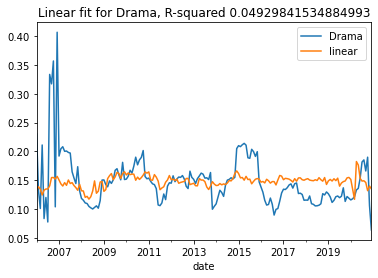

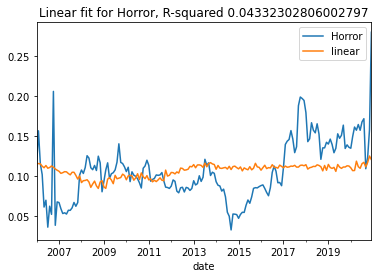

In [8]:
# try linear regression
# not applying train_test_split; linear regression doesn't have enough factors to over-fit
with PdfPages('LinearRegression.pdf') as pdf:
    for column in data.columns[6:]:
        y=data[[column]]
        model=LinearRegression()
        model.fit(X,y)
        y_pred=model.predict(X)
        r2=model.score(X,y)
        plot_df=y
        plot_df['linear']=y_pred
        plot_title=f'Linear fit for {column}, R-squared {r2}'
        plot_df.plot.line(title=plot_title)
        pdf.savefig()
        plot_df.to_csv(f"{column}LinearRegression.csv", index = None) 

    plt.close()

<ipython-input-13-7e9f20590051>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['tree']=y_pred
<ipython-input-13-7e9f20590051>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['tree']=y_pred
<ipython-input-13-7e9f20590051>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

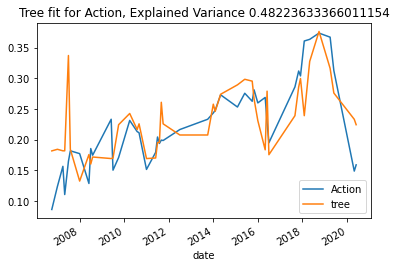

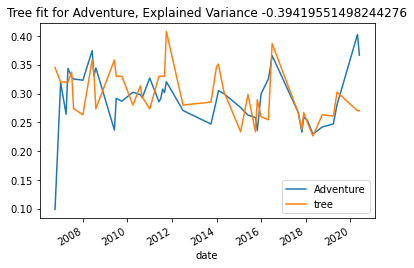

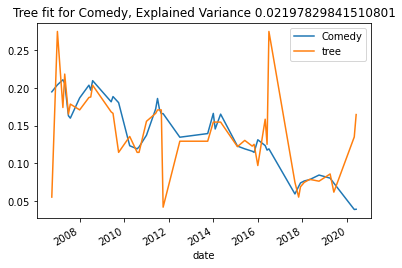

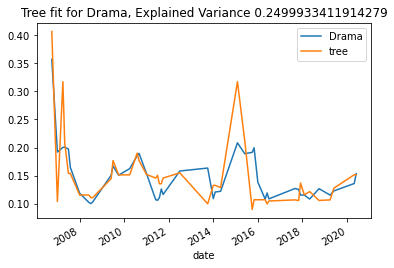

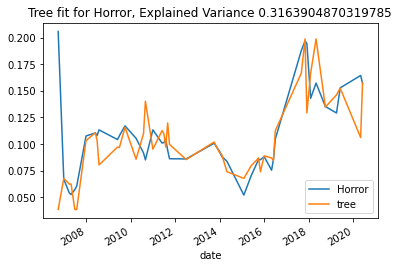

In [13]:
# try a decision tree

i=0
with PdfPages('DecisionTree.pdf') as pdf:
    for column in data.columns[6:]:
        y=data[[column]]
        X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)       
        clf =tree.DecisionTreeRegressor()
        clf = clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        ev_score=explained_variance_score(y_test,y_pred)
        plot_df=y_test
        plot_df['tree']=y_pred
        plot_title=f'Tree fit for {column}, Explained Variance {ev_score}'
        plot_df.plot.line(title=plot_title)
        pdf.savefig()
        plot_df.to_csv(f"{column}DecisionTree.csv", index = None)
        if i==0:
            combined_df=plot_df
        else:
            #set_trace()
            combined_df[column]=plot_df[column]
            combined_df[column+'_pred']=plot_df['tree']
        i+=1
        
    plt.close()


<ipython-input-29-baec576766c9>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train,y_train)
<ipython-input-29-baec576766c9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['tree']=y_pred
<ipython-input-29-baec576766c9>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train,y_train)
<ipython-input-29-baec576766c9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

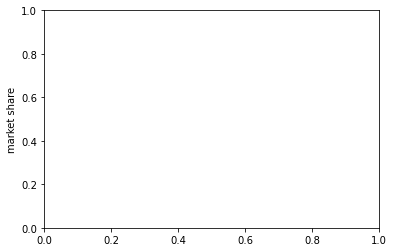

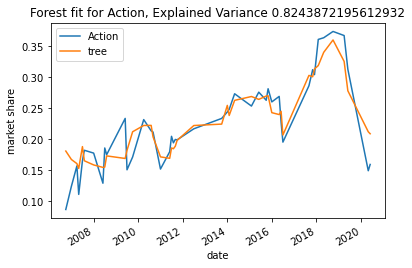

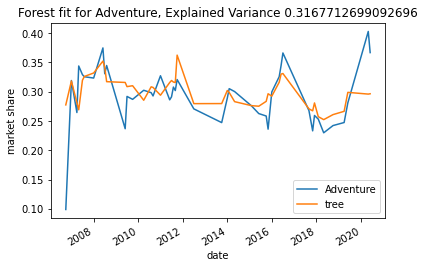

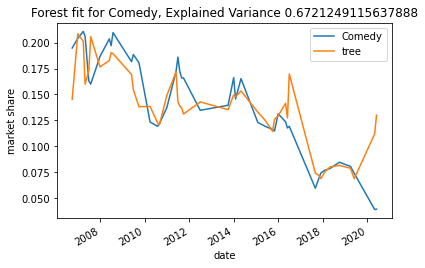

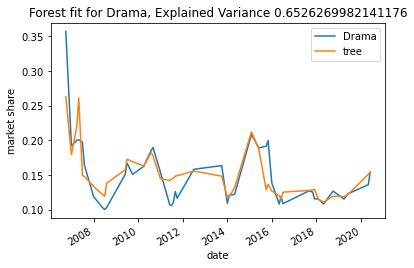

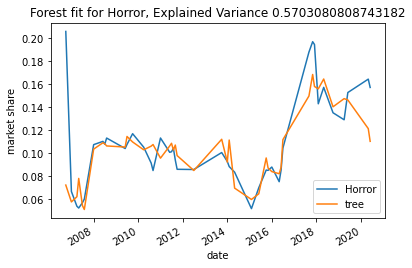

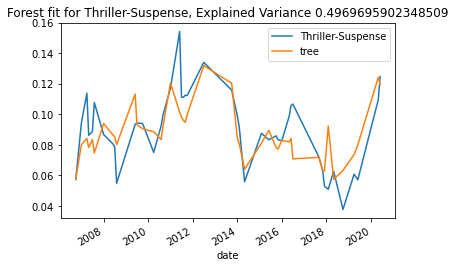

In [29]:
%matplotlib inline
# try a random forest regressor
from sklearn.ensemble import RandomForestRegressor


i=0
with PdfPages('RandomForest.pdf') as pdf:
    for column in data.columns[6:]:
        y=data[[column]]
        X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)       
        clf = RandomForestRegressor(n_estimators=100)
        clf = clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        ev_score=explained_variance_score(y_test,y_pred)
        plot_df=y_test
        plot_df['tree']=y_pred
        plot_title=f'Forest fit for {column}, Explained Variance {ev_score}'
        
        plt.ylabel('market share')
        plot_df.plot.line(title=plot_title)
        
        pdf.savefig()
        
        plot_df.to_csv(f"{column}RandomForest.csv", index = None)
        if i==0:
            combined_df=plot_df
        else:
            #set_trace()
            combined_df[column]=plot_df[column]
            combined_df[column+'_pred']=plot_df['tree']
        i+=1
    plt.show()
    plt.close()


In [26]:
plt.show()